<a href="https://colab.research.google.com/github/GOLISHYAMP/Colab_Notebooks/blob/main/KNN_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples= 1000, n_features = 2,noise = 10, random_state=31)

In [4]:
X

array([[-0.16510139, -0.85347582],
       [ 1.25912004, -0.79600886],
       [-0.5952629 , -1.78270064],
       ...,
       [ 0.24729801, -0.33856649],
       [ 1.19155296,  0.81087328],
       [ 1.78892047, -0.3711012 ]])

In [5]:
y

array([ -36.13482373,   92.77010136, -101.68107919,  141.92629567,
        -25.87815275,  144.63399085,   33.84611868,  -23.30105458,
         63.65960726,  -57.41092107,   27.11123065,   -8.02573051,
        102.4994528 ,   -1.50473435, -104.0112414 ,   65.52561203,
         -6.98271525,  159.89032742,   91.34554688,  -19.9270443 ,
       -102.93148155,   32.74329223,   75.50508777,   20.0060409 ,
         73.50754553,  -73.06948392,   43.20272469,  -63.19866347,
          3.18538584,   75.75374063,   31.17416421,  -26.98421866,
        -12.83480679,   89.94017359,  -42.24873116,    0.55312418,
         73.05802131,   40.35722378,   48.69526757,   16.98456292,
         64.81717083,  -63.4660753 , -107.23223992,  276.36515691,
         41.10946154,   29.43006952,  136.21530451,  -89.63804885,
        132.18984977,   40.50982919,   33.15691783,  -68.1729051 ,
         96.4844488 ,   36.14500016,   20.05187085, -116.96207759,
         -3.68322572,  -66.96740737,  -61.68816687, -118.62727

<Axes: >

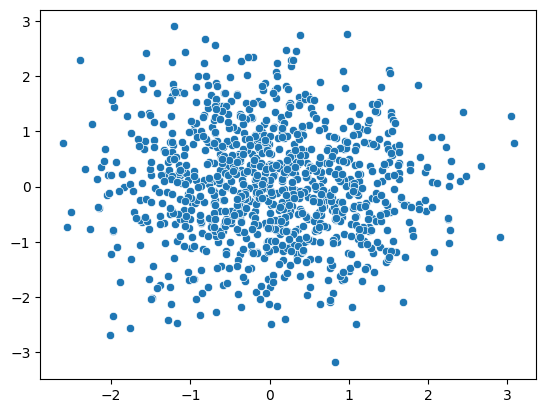

In [6]:
sns.scatterplot(x=X[:, 0], y = X[:, 1])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [10]:
y_pred = knr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9720711440920935
191.52600183908217


In [13]:
params = {
    'n_neighbors':[2,3,4,5,6,7,8],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1, 2]
}

In [14]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = params, scoring = 'r2', refit = True, n_jobs=-1, cv = 5 )


In [15]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [16]:
grid.best_params_

{'algorithm': 'brute', 'n_neighbors': 8, 'p': 2, 'weights': 'distance'}

In [17]:
grid.best_score_

0.972699008866454

In [18]:
y_pred = grid.predict(X_test)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.974127575403458
177.42373898875096
